# Rainbow Six Siege Analysis and Prediction

## Research Topics

- Exporatory Analysis
    - Player behaviour
    - Game Balance
        - Map Balance (Attacker vs Defender)
- Prediction
    - predict the outcome of a match (win/lose)
    - (operator pick recomandation)

## Research Concept
- Focus on PC platform and gamemode "Bomb"
- Find correlations and biases in the dataset
- Make use of these correlations and biases to generate suitable input vectors for ML models

## ToDo's
- Data Encoding for Prediction
    - One Hot Encoding
- Baseline Performance with Naive Bias
- Use a simple MLP in Comparison

In [20]:
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import MultinomialNB

In [2]:
operators = pd.read_csv("./data/datadump_s5_summary_operator_loadout.csv")
operators.head()

,platform,dateid,skillrank,role,operator,primaryweapon,secondaryweapon,secondarygadget,nbwins,nbkills,nbdeaths,nbpicks
0,PC,20170210,Bronze,Attacker,BOPE-CAPITAO,M249,PRB92,CLAYMORE,6,6,6,8
1,PC,20170210,Bronze,Attacker,BOPE-CAPITAO,M249,PRB92,STUN GRENADE,4,2,6,8
2,PC,20170210,Bronze,Attacker,BOPE-CAPITAO,PARA-308,PRB92,CLAYMORE,37,40,49,70
3,PC,20170210,Bronze,Attacker,BOPE-CAPITAO,PARA-308,PRB92,STUN GRENADE,17,24,31,41
4,PC,20170210,Bronze,Attacker,G.E.O.-JACKAL,C7E,ITA12S,BREACH CHARGE,74,123,127,174


In [3]:
operators = operators.loc[operators['platform'] == ('PC')]
operators.drop(['dateid','platform','primaryweapon','secondaryweapon','secondarygadget'], axis=1, inplace=True)
operators = operators.groupby(['skillrank','role', 'operator'], as_index=False)['nbwins', 'nbkills', 'nbdeaths', 'nbpicks'].sum()
operators.head()

C:\Users\marti\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,skillrank,role,operator,nbwins,nbkills,nbdeaths,nbpicks
0,Bronze,Attacker,BOPE-CAPITAO,7131,9507,11290,15383
1,Bronze,Attacker,G.E.O.-JACKAL,21358,32434,32760,45492
2,Bronze,Attacker,GIGN-MONTAGNE,12175,9773,19389,26981
3,Bronze,Attacker,GIGN-RESERVE,377,432,701,946
4,Bronze,Attacker,GIGN-TWITCH,25733,35115,36318,53941


C:\Users\marti\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
C:\Users\marti\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\marti\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


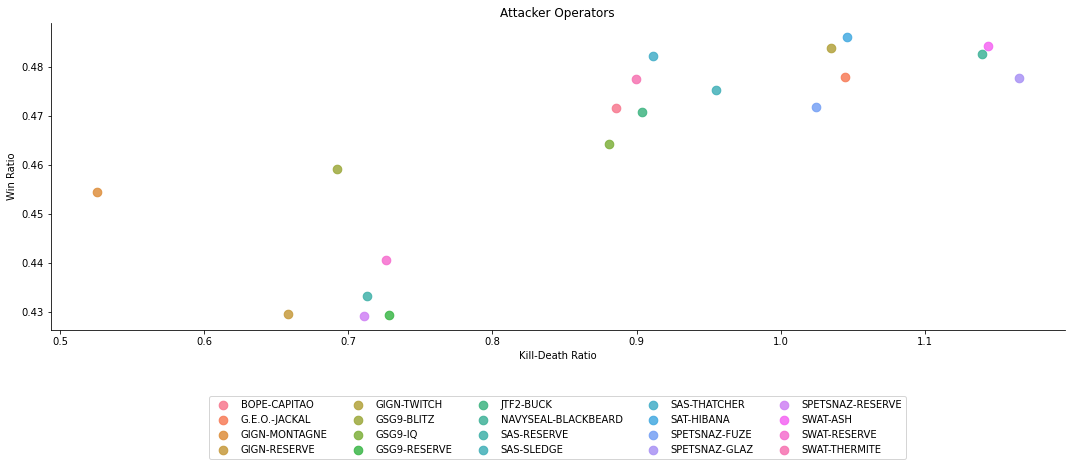

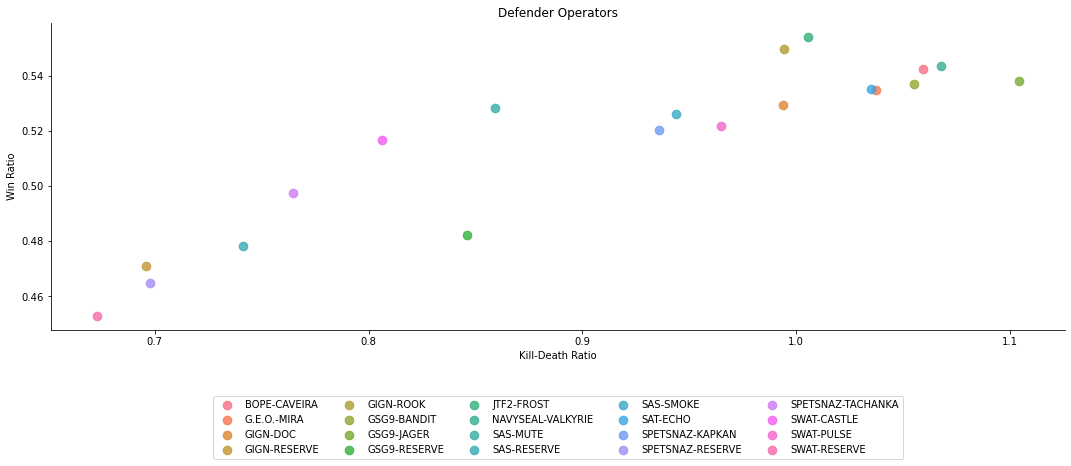

In [4]:
# Grouping by role and operator, disregarding skillrank
operator_groups = operators.groupby(['role', 'operator'], as_index=False)['nbwins', 'nbkills', 'nbdeaths', 'nbpicks'].sum()

# Adding k/d and win ratio columns
operator_groups['k/d_ratio'] = pd.to_numeric(operator_groups['nbkills']) / pd.to_numeric(operator_groups['nbdeaths'])
operator_groups['win_ratio'] = pd.to_numeric(operator_groups['nbwins']) / pd.to_numeric(operator_groups['nbpicks'])

# Splitting data by role
ops_roles = operator_groups.groupby('role')

# Graphing Attackers and Defenders on separate graphs
for role, tbl in ops_roles:
    sns.lmplot(x="k/d_ratio", y="win_ratio", data=tbl, fit_reg=False, hue='operator',
               legend=False, size=5, aspect=3, scatter_kws={"s": 75})
    plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=5)
    plt.title(role + ' Operators')
    plt.xlabel('Kill-Death Ratio')
    plt.ylabel('Win Ratio')
plt.show()

In [12]:
operator_groups

,role,operator,nbwins,nbkills,nbdeaths,nbpicks,k/d_ratio,win_ratio
0,Attacker,BOPE-CAPITAO,65205,89647,101216,138254,0.885700,0.471632
1,Attacker,G.E.O.-JACKAL,193793,304650,291541,405461,1.044965,0.477957
2,Attacker,GIGN-MONTAGNE,98517,81475,155090,216753,0.525340,0.454513
3,Attacker,GIGN-RESERVE,2558,2941,4469,5954,0.658089,0.429627
4,Attacker,GIGN-TWITCH,227325,328186,317090,469867,1.034993,0.483807
5,Attacker,GSG9-BLITZ,45829,52784,76280,99824,0.691977,0.459098
6,Attacker,GSG9-IQ,64406,89407,101472,138740,0.881100,0.464221
7,Attacker,GSG9-RESERVE,8662,11528,15829,20175,0.728284,0.429343
8,Attacker,JTF2-BUCK,120327,169379,187398,255529,0.903846,0.470894
9,Attacker,NAVYSEAL-BLACKBEARD,134465,216468,189879,278612,1.140031,0.482625


In [15]:
operator_groups["lose_ratio"] = 1 - operator_groups["win_ratio"]
operator_groups

,role,operator,nbwins,nbkills,nbdeaths,nbpicks,k/d_ratio,win_ratio,lose_ratio
0,Attacker,BOPE-CAPITAO,65205,89647,101216,138254,0.885700,0.471632,0.528368
1,Attacker,G.E.O.-JACKAL,193793,304650,291541,405461,1.044965,0.477957,0.522043
2,Attacker,GIGN-MONTAGNE,98517,81475,155090,216753,0.525340,0.454513,0.545487
3,Attacker,GIGN-RESERVE,2558,2941,4469,5954,0.658089,0.429627,0.570373
4,Attacker,GIGN-TWITCH,227325,328186,317090,469867,1.034993,0.483807,0.516193
5,Attacker,GSG9-BLITZ,45829,52784,76280,99824,0.691977,0.459098,0.540902
6,Attacker,GSG9-IQ,64406,89407,101472,138740,0.881100,0.464221,0.535779
7,Attacker,GSG9-RESERVE,8662,11528,15829,20175,0.728284,0.429343,0.570657
8,Attacker,JTF2-BUCK,120327,169379,187398,255529,0.903846,0.470894,0.529106
9,Attacker,NAVYSEAL-BLACKBEARD,134465,216468,189879,278612,1.140031,0.482625,0.517375


In [42]:
X = operator_groups[["win_ratio", "lose_ratio"]].to_numpy()
X

array([[0.47163192, 0.52836808],
       [0.47795719, 0.52204281],
       [0.45451274, 0.54548726],
       [0.42962714, 0.57037286],
       [0.48380712, 0.51619288],
       [0.45909801, 0.54090199],
       [0.46422084, 0.53577916],
       [0.42934325, 0.57065675],
       [0.47089371, 0.52910629],
       [0.48262458, 0.51737542],
       [0.43321499, 0.56678501],
       [0.4753102 , 0.5246898 ],
       [0.48225762, 0.51774238],
       [0.48613703, 0.51386297],
       [0.47187153, 0.52812847],
       [0.4777352 , 0.5222648 ],
       [0.42925135, 0.57074865],
       [0.48419504, 0.51580496],
       [0.44069118, 0.55930882],
       [0.47754371, 0.52245629],
       [0.54250343, 0.45749657],
       [0.5347405 , 0.4652595 ],
       [0.52943052, 0.47056948],
       [0.47115385, 0.52884615],
       [0.54954586, 0.45045414],
       [0.53682811, 0.46317189],
       [0.53800241, 0.46199759],
       [0.48218508, 0.51781492],
       [0.55399626, 0.44600374],
       [0.54355267, 0.45644733],
       [0.

In [43]:
y = np.array(["win", "lose"])
y

array(['win', 'lose'], dtype='<U4')

In [44]:
print(X.shape, y.shape)

(40, 2) (2,)


In [45]:
clf = MultinomialNB()
clf.fit(X, y)
clf.predict(X[2:4])

ValueError: Found input variables with inconsistent numbers of samples: [40, 2]

In [40]:
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 3))
y = np.array([1, 2, 3, 4, 5, 6])

print(X.shape, y.shape)

clf = MultinomialNB()
clf.fit(X, y)
clf.predict(X[2:4])

(6, 3) (6,)


array([3, 4])